# FARSANA K S                          
## ASSIGNMENT V                                                                                                            - AOE 5132                

### QUESTION 1

### Produce the kde plot for GRB T90 distribution using top hat and gaussian kernels for three different bandwidths which include demonstrating the scenario of under-smoothed, over-smoothed and properly smoothed.  

In [67]:
from astropy.table import Table
import matplotlib.pyplot as plt
t1 = Table.read('Fermi_GBM_catalog_15_8_22.txt',format='ascii',guess=False, delimiter='|')

T90 = t1['t90']

# Create a range of bandwidths
bandwidths = [0.01, 0.45, 10.0]

### Tophat Kernel

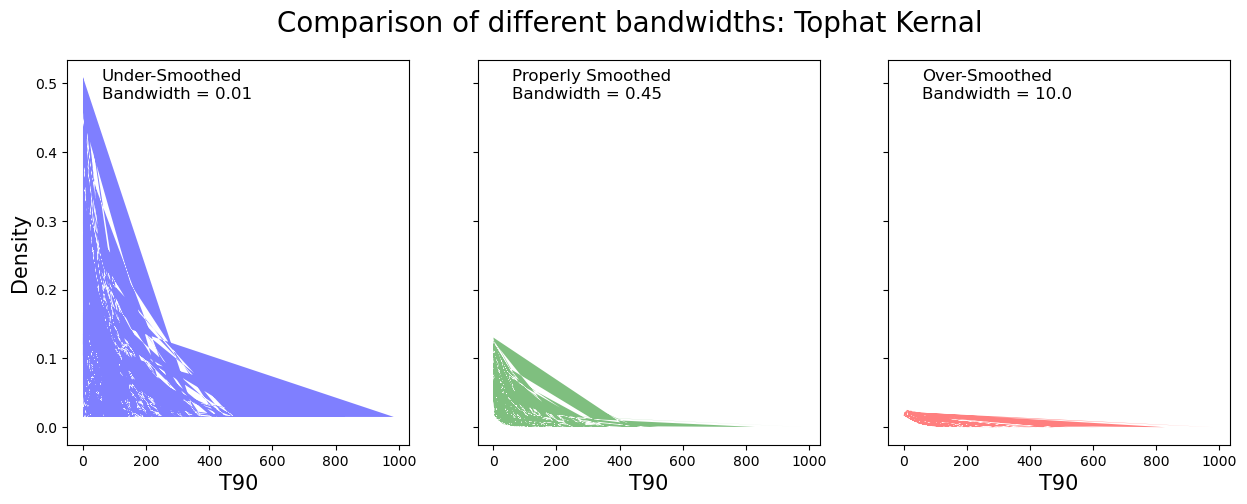

In [68]:
from sklearn.neighbors import KernelDensity

# Tophat KDE
fig, axs = plt.subplots(1, len(bandwidths), figsize=(15, 5), sharey=True)
colors = ['b', 'g', 'r']
titles = ['Under-Smoothed', 'Properly Smoothed', 'Over-Smoothed']

for i, bandwidth in enumerate(bandwidths):
    ax = axs[i]

    # Reshape T90 to a 2D array with a single feature
    T90_2d = T90[:, np.newaxis]

    # Create the KDE model with the Tophat kernel and the current bandwidth
    kde = KernelDensity(kernel="tophat", bandwidth=bandwidth).fit(T90_2d)

    # Compute the log-likelihood of each sample under the model
    log_dens = kde.score_samples(T90_2d)

    # Plot the KDE
    ax.fill(T90, np.exp(log_dens), fc=colors[i], alpha=0.5)
    ax.text(0.1, 0.9, f"{titles[i]}\nBandwidth = {bandwidth}", transform=ax.transAxes, fontsize=12)

# Add a title to the subplot
plt.suptitle("Comparison of different bandwidths: Tophat Kernal\n", fontsize = 20)    
    
# Set common labels
for ax in axs:
    ax.set_xlabel("T90", fontsize=15)
axs[0].set_ylabel("Density", fontsize=15)

plt.show()


### Gaussian Kernel

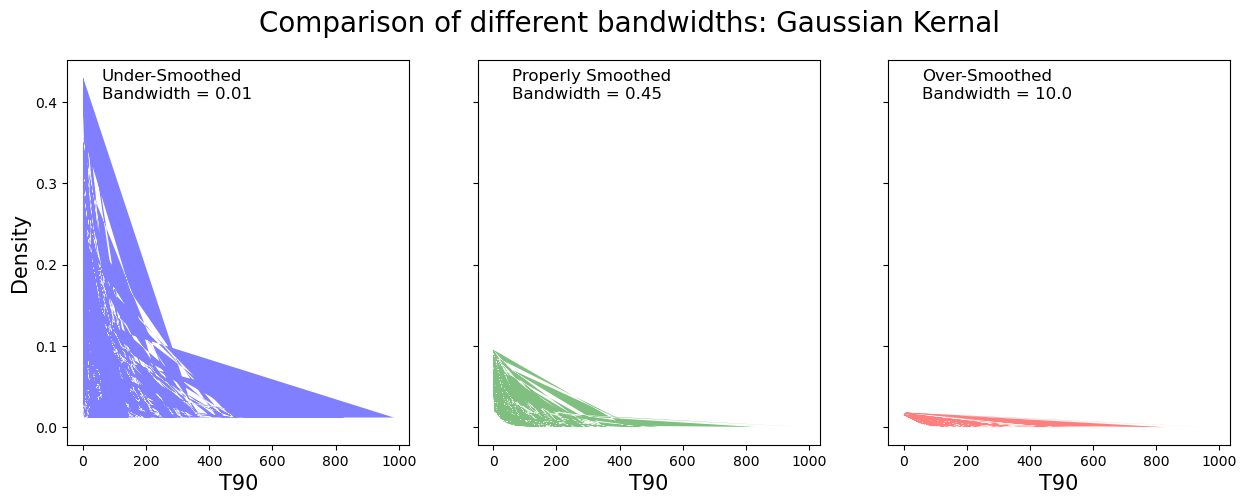

In [69]:
# Gaussian KDE
fig, axs = plt.subplots(1, len(bandwidths), figsize=(15, 5), sharey=True)
colors = ['b', 'g', 'r']
titles = ['Under-Smoothed', 'Properly Smoothed', 'Over-Smoothed']

for i, bandwidth in enumerate(bandwidths):
    ax = axs[i]

    # Reshape T90 to a 2D array with a single feature
    T90_2d = T90[:, np.newaxis]

    # Create the KDE model with the Tophat kernel and the current bandwidth
    kde = KernelDensity(kernel="gaussian", bandwidth=bandwidth).fit(T90_2d)

    # Compute the log-likelihood of each sample under the model
    log_dens = kde.score_samples(T90_2d)

    # Plot the KDE
    ax.fill(T90, np.exp(log_dens), fc=colors[i], alpha=0.5)
    ax.text(0.1, 0.9, f"{titles[i]}\nBandwidth = {bandwidth}", transform=ax.transAxes, fontsize=12)
    
# Add a title to the subplot
plt.suptitle("Comparison of different bandwidths: Gaussian Kernal\n", fontsize = 20)

# Set common labels
for ax in axs:
    ax.set_xlabel("T90", fontsize=15)
axs[0].set_ylabel("Density", fontsize=15)

plt.show()


### QUESTION 2

###  Use the Savgol filter to produce the smoothed curve of the sample dataset below that consists of the minimum temperatures across the months of the year from the Southern Hemisphere from 1981 to 1990 



In [1]:
import pandas as pd
data = pd.read_csv('daily-min-temperatures.csv')
data.head()

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


In [7]:
Time = data['Date']  
Temp = data['Temp']
data.shape

(3650, 2)

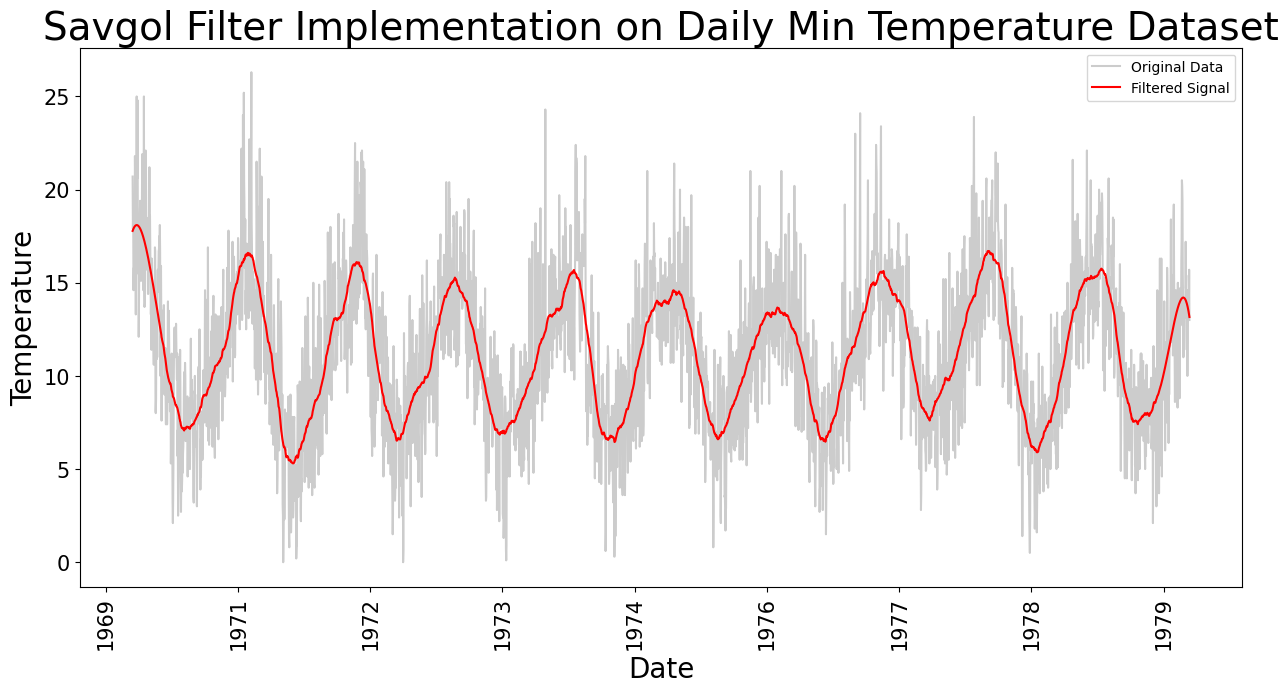

In [15]:
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
import matplotlib.dates as mdates

# Apply Savitzky-Golay filter to smooth the temperature data
ysg = savgol_filter(Temp, window_length=200, polyorder=4)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(15, 7))

# Plot the original data
ax.plot(Time, Temp, 'k', alpha=0.2, label='Original Data')

# Plot the filtered signal
ax.plot(Time, ysg, 'r', label='Filtered Signal')

# Customize the x-axis date formatting
dtFmt = mdates.DateFormatter('%Y')
ax.xaxis.set_major_formatter(dtFmt)
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=15))
plt.xticks(rotation=90, fontweight='light', fontsize='x-small')

# Customize tick label sizes
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)

# Set axis labels and legend
plt.title('Savgol Filter Implementation on Daily Min Temperature Dataset', fontsize = 28)
ax.set_xlabel('Date', fontsize=20)
ax.set_ylabel('Temperature', fontsize=20)
ax.legend()

# Show the plot
plt.show()


### QUESTION 3

### Using the fits data file for the GRB160624477, 
### (a) Plot the lightcurve of the GRB using an appropriate bin width such that the GRB is visible (has a good signal to noise ratio).
### Note: Lightcurve is just the histogram of the TIME column data (available within the fits file). The Trigger time of the GRB is 488460437.76 s. Please choose the data between -50 s to +50s around the trigger time of the GRB.  


In [47]:
from astropy.io import fits
from numpy import arange
file = fits.open('glg_tte_n2_bn160624477_v00.fit')
file.info()

Filename: glg_tte_n2_bn160624477_v00.fit
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  EBOUNDS       1 BinTableHDU     58   128R x 3C   [1I, 1E, 1E]   
  2  EVENTS        1 BinTableHDU     48   634412R x 2C   [1D, 1I]   
  3  GTI           1 BinTableHDU     44   1R x 2C   [1D, 1D]   


In [48]:
import numpy as np
# load the data in separate variable
pha_data1 = file[1].data

#load the data in separate variable events
pha_data2 = file[2].data

#PHA
PHA =pha_data2['PHA']

#Time
Time = pha_data2['TIME']

trig = 488460437.76
T_n7 = Time - trig

binwidth = 0.5
bins =np.arange(int(min(T_n7)),int(max(T_n7)) + binwidth, binwidth)
counts, edges=np.histogram(T_n7,bins)

T =[]
for i in range(len(edges)-1):
    T.append((edges[i] + edges[i+1])/2)

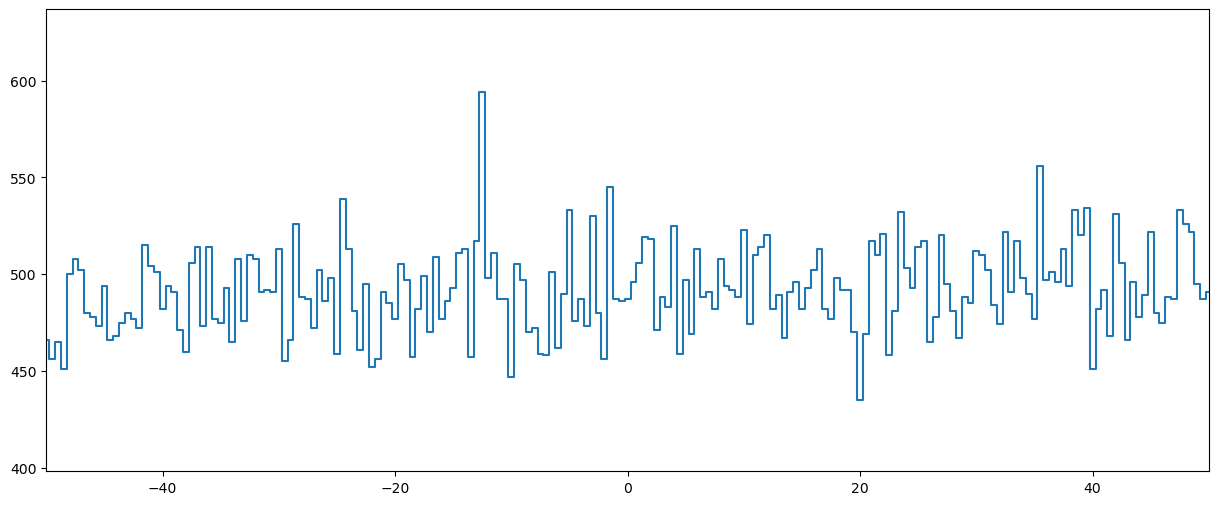

In [49]:
plt.figure(figsize = (15,6))

plt.step(T,counts)
plt.xlim(-50,50)
plt.show()

### (b) Compare the signal to noise ratio of the GRB detection in three different binwidths: 0.01s, 1s and 10 s.

## 0.01s

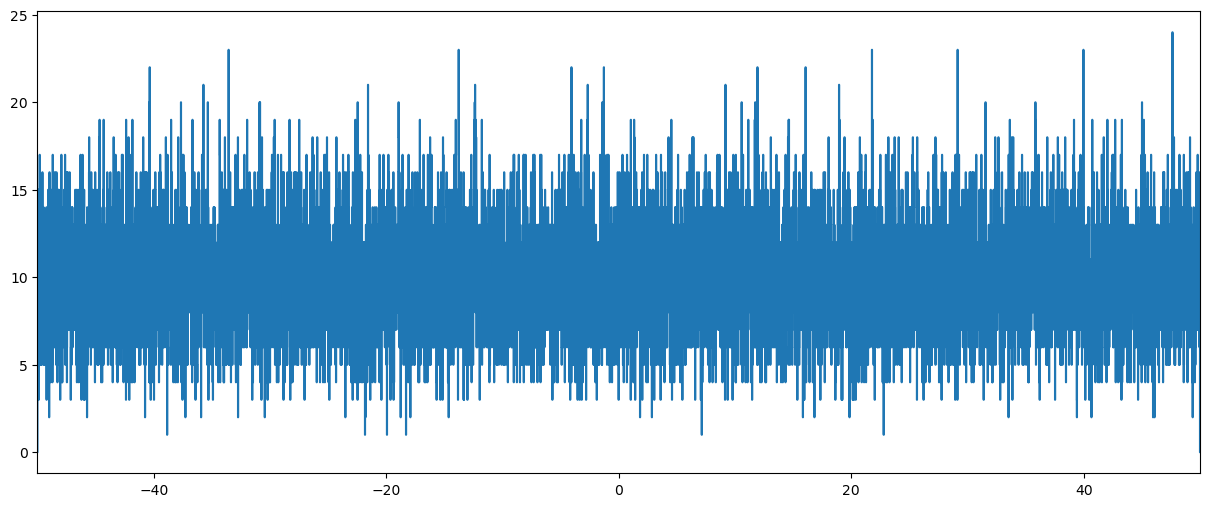

In [46]:
#Bin width
binwidth = 0.01  #sec

#Bins info 
bins =arange(int(min(T_n7)),int(max(T_n7)) + binwidth, binwidth)
#Nbins =len(bins) 
 
#Histogram of events times
counts_n7, edges=np.histogram(Time_lc,bins)

Tav_n7 =[]
for i in range(len(edges)-1):
    Tav_n7.append((edges[i] + edges[i+1])/2)

import matplotlib.pyplot as plt
plt.figure(figsize = (15,6))
plt.step(Tav_n7,counts_n7,where='mid')
plt.xlim([-50,50])
plt.show()

## 1s

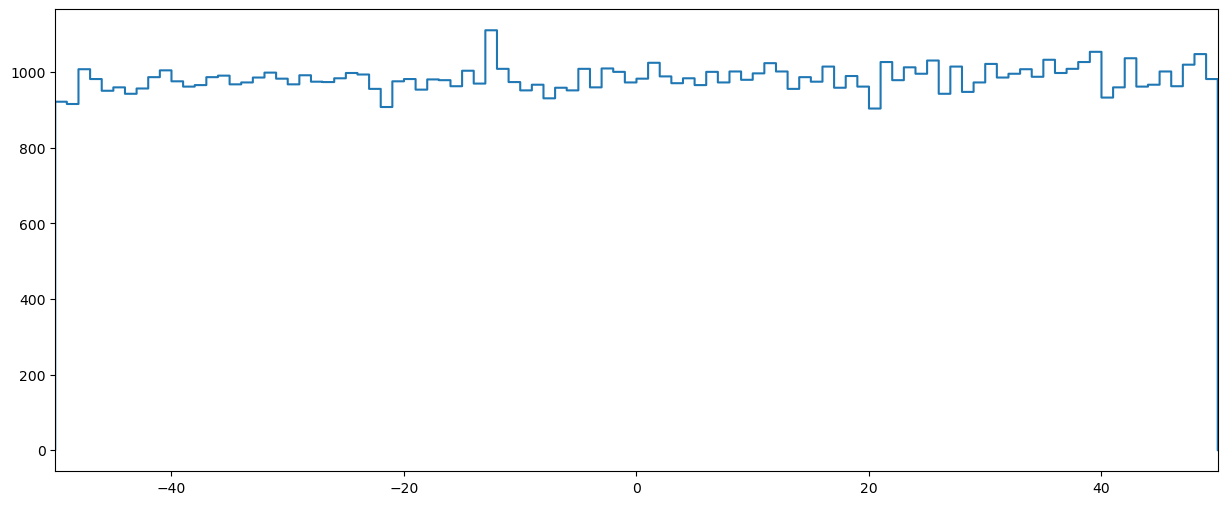

In [45]:
#Bin width
binwidth = 1  #sec

#Bins info 
bins =arange(int(min(T_n7)),int(max(T_n7)) + binwidth, binwidth)
#Nbins =len(bins) 
 
#Histogram of events times
counts_n7, edges=np.histogram(Time_lc,bins)

Tav_n7 =[]
for i in range(len(edges)-1):
    Tav_n7.append((edges[i] + edges[i+1])/2)

import matplotlib.pyplot as plt
plt.figure(figsize = (15,6))
plt.step(Tav_n7,counts_n7,where='mid')
plt.xlim([-50,50])
plt.show()

## 10s

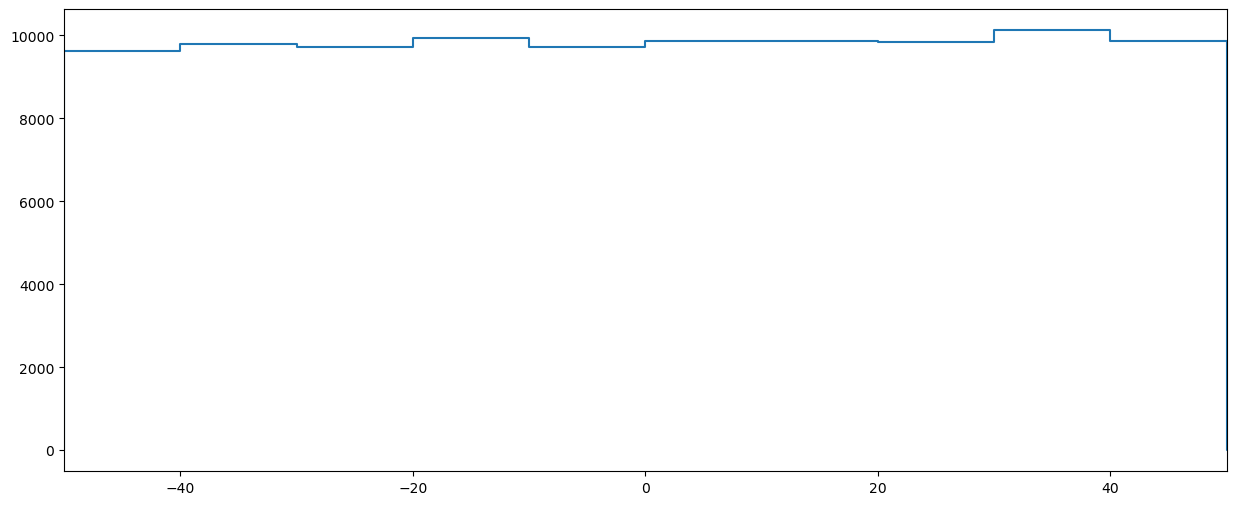

In [44]:
#Bin width
binwidth = 10  #sec

#Bins info 
bins =arange(int(min(T_n7)),int(max(T_n7)) + binwidth, binwidth)
#Nbins =len(bins) 
 
#Histogram of events times
counts_n7, edges=np.histogram(Time_lc,bins)

Tav_n7 =[]
for i in range(len(edges)-1):
    Tav_n7.append((edges[i] + edges[i+1])/2)

import matplotlib.pyplot as plt
plt.figure(figsize = (15,6))
plt.step(Tav_n7,counts_n7,where='mid')
plt.xlim([-50,50])
plt.show()